In [53]:
import os
import json
import matplotlib.pyplot as plt

conference_name = ['CIKM', 'EMNLP', 'AAAI', 'ICML', 'NeurlPS', 'ICASSP', 'CVPR', 'ICDM']
conference_id = ['1194094125', '1192655580', '1184914352', '1180662882',
                 '1127325140', '1121227772', '1158167855', '1183478919']

In [54]:
cite_dic = {}
for cid in conference_id:
    cdir = './paper_' + cid + '/' + cid + '_paperID'
    file_list = os.listdir(cdir)
    tmp = []
    for file in file_list:
        f = open(os.path.join(cdir, file))
        try:
            data = json.load(f)
            tmp.append(data['cited_by_count'])
        except:
            pass
    cite_dic[cid] = tmp

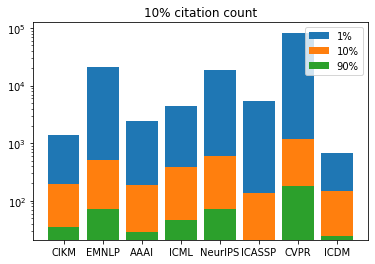

In [55]:
plt.title('10% citation count')
label = cite_dic.keys()
x = []
y = []
z = []
for i in label:
    x.append(sorted(cite_dic[i], reverse=True)[len(cite_dic[i]) // 10])
    y.append(sorted(cite_dic[i], reverse=True)[len(cite_dic[i]) // 100])
    z.append(max(cite_dic[i]))

p1 = plt.bar(conference_name, z, bottom=y)
p2 = plt.bar(conference_name, y, bottom=x)
p3 = plt.bar(conference_name, x)
plt.yscale('log', base=10)
plt.legend(('1%', '10%', '90%'))
plt.show()